**Election Sentiment Analysis**
--Sentiment analysis is a method by which we may read a text and determine the sentiment, including the attitude or mindset it conveys. This method helps businesses track customer needs and understand them appropriately by classifying the sentiment of textual data as positive, negative, or neutral.

**NLP- Natural Language processing**
--Natural Language Processing is a subfield of Artificial Intelligence that enables computers to understand, analyze, and manipulate human language.

Here we use the same model to forecast the outcome of the U.S. election by examining the sentiment behind the significant number of tweets by the general public toward participating candidates in the U.S. election.

In [ ]:
!pip install nltk
!pip install wordcloud
!pip install textblob

In [ ]:
import nltk

In [ ]:
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
# Libraries for Sentiment Analysis
import re
import nltk
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
from wordcloud import WordCloud
from wordcloud import STOPWORDS

import warnings
warnings.filterwarnings('ignore')

#Dataset features:

# created_at: Date and time of tweet posted
# tweet_id: Tweet’s unique ID
# tweet: Full tweet text
# likes: Number of likes
# retweet_count: Number of retweets
# source: Utility used to post the tweet
# user_id: User ID of tweet creator
# user_name: Username of tweet creator
# user_screen_name: Screen name of tweet creator
# user_description: Self-description by tweet creator
# user_join_date: Join date of tweet creator
# user_followers_count: Followers count on tweet creator
# user_location: Address was given on tweeter’s profile
# lat: Latitude parsed from user_location
# long: Longitude parsed from user_location
# city: City parsed from user_location
# country: Country parsed from user_location
# state: State parsed from user_location
# state_code: State code parsed from user_location
# collected_at: Date and time tweet data was mined from Twitter

In [ ]:
t_data = pd.read_csv('/content/drive/MyDrive/Softronics/Classwork/hashtag_donaldtrump.csv', lineterminator='\n')
print(t_data.head(3))

            created_at      tweet_id  \
0  2020-10-15 00:00:01  1.316529e+18   
1  2020-10-15 00:00:01  1.316529e+18   
2  2020-10-15 00:00:02  1.316529e+18   

                                               tweet  likes  retweet_count  \
0  #Elecciones2020 | En #Florida: #JoeBiden dice ...    0.0            0.0   
1  Usa 2020, Trump contro Facebook e Twitter: cop...   26.0            9.0   
2  #Trump: As a student I used to hear for years,...    2.0            1.0   

             source      user_id           user_name user_screen_name  \
0         TweetDeck  360666534.0  El Sol Latino News  elsollatinonews   
1  Social Mediaset   331617619.0             Tgcom24  MediasetTgcom24   
2   Twitter Web App    8436472.0              snarke           snarke   

                                    user_description  ...  \
0  🌐 Noticias de interés para latinos de la costa...  ...   
1  Profilo ufficiale di Tgcom24: tutte le notizie...  ...   
2  Will mock for food! Freelance writer, blogger,.

In [ ]:
 print(t_data.columns)

Index(['created_at', 'tweet_id', 'tweet', 'likes', 'retweet_count', 'source',
       'user_id', 'user_name', 'user_screen_name', 'user_description',
       'user_join_date', 'user_followers_count', 'user_location', 'lat',
       'long', 'city', 'country', 'continent', 'state', 'state_code',
       'collected_at'],
      dtype='object')


In [ ]:
j_data = pd.read_csv('/content/drive/MyDrive/Softronics/Classwork/hashtag_joebiden.csv', lineterminator='\n')
print(j_data.head(2))

            created_at      tweet_id  \
0  2020-10-15 00:00:01  1.316529e+18   
1  2020-10-15 00:00:18  1.316529e+18   

                                               tweet  likes  retweet_count  \
0  #Elecciones2020 | En #Florida: #JoeBiden dice ...    0.0            0.0   
1  #HunterBiden #HunterBidenEmails #JoeBiden #Joe...    0.0            0.0   

             source      user_id           user_name user_screen_name  \
0         TweetDeck  360666534.0  El Sol Latino News  elsollatinonews   
1  Twitter for iPad  809904438.0         Cheri A. 🇺🇸     Biloximeemaw   

                                    user_description  ...  \
0  🌐 Noticias de interés para latinos de la costa...  ...   
1  Locked and loaded Meemaw. Love God, my family ...  ...   

  user_followers_count                 user_location       lat      long  \
0               1860.0  Philadelphia, PA / Miami, FL  25.77427 -80.19366   
1               6628.0                           NaN       NaN       NaN   

   city    

In [ ]:
print(t_data.shape)
print(j_data.shape)

(970919, 21)
(776886, 21)


From the output obtained, we can observe that the general public across different nations has tweeted more about Donald Trump as compared to Joe Biden, it can be good or bad!

In [ ]:
t_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970919 entries, 0 to 970918
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   created_at            970919 non-null  object 
 1   tweet_id              970919 non-null  float64
 2   tweet                 970919 non-null  object 
 3   likes                 970919 non-null  float64
 4   retweet_count         970919 non-null  float64
 5   source                970043 non-null  object 
 6   user_id               970919 non-null  float64
 7   user_name             970903 non-null  object 
 8   user_screen_name      970919 non-null  object 
 9   user_description      869653 non-null  object 
 10  user_join_date        970919 non-null  object 
 11  user_followers_count  970919 non-null  float64
 12  user_location         675966 non-null  object 
 13  lat                   445719 non-null  float64
 14  long                  445719 non-null  float64
 15  

In [ ]:
j_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776886 entries, 0 to 776885
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   created_at            776886 non-null  object 
 1   tweet_id              776886 non-null  float64
 2   tweet                 776886 non-null  object 
 3   likes                 776886 non-null  float64
 4   retweet_count         776886 non-null  float64
 5   source                776173 non-null  object 
 6   user_id               776886 non-null  float64
 7   user_name             776868 non-null  object 
 8   user_screen_name      776886 non-null  object 
 9   user_description      694880 non-null  object 
 10  user_join_date        776886 non-null  object 
 11  user_followers_count  776886 non-null  float64
 12  user_location         543095 non-null  object 
 13  lat                   355293 non-null  float64
 14  long                  355293 non-null  float64
 15  

In [ ]:
t_data['candidate'] = 'trump'
j_data['candidate'] = 'biden'

In [ ]:
data = pd.concat([t_data, j_data])
# FInal data shape
print('Final Data Shape :', data.shape)
print("\nFirst 2 rows:")
print(data.head(3))

Final Data Shape : (1747805, 22)

First 2 rows:
            created_at      tweet_id  \
0  2020-10-15 00:00:01  1.316529e+18   
1  2020-10-15 00:00:01  1.316529e+18   
2  2020-10-15 00:00:02  1.316529e+18   

                                               tweet  likes  retweet_count  \
0  #Elecciones2020 | En #Florida: #JoeBiden dice ...    0.0            0.0   
1  Usa 2020, Trump contro Facebook e Twitter: cop...   26.0            9.0   
2  #Trump: As a student I used to hear for years,...    2.0            1.0   

             source      user_id           user_name user_screen_name  \
0         TweetDeck  360666534.0  El Sol Latino News  elsollatinonews   
1  Social Mediaset   331617619.0             Tgcom24  MediasetTgcom24   
2   Twitter Web App    8436472.0              snarke           snarke   

                                    user_description  ...  \
0  🌐 Noticias de interés para latinos de la costa...  ...   
1  Profilo ufficiale di Tgcom24: tutte le notizie...  ...   
2 

In [ ]:
data.dropna(inplace=True)

In [ ]:
data['country'].value_counts()

United States of America    182384
United Kingdom               31869
India                        20932
France                       19996
Germany                      18534
Canada                       16250
The Netherlands               8491
Australia                     8330
Spain                         5254
Brazil                        4211
Pakistan                      3704
Italy                         2966
Ireland                       2587
Bangladesh                    2036
Mexico                        1972
Belgium                       1962
Nigeria                       1848
South Africa                  1648
United Arab Emirates          1521
Switzerland                   1494
Peru                          1031
Lebanon                       1002
Argentina                      872
Ecuador                        824
Colombia                       565
Honduras                       508
Venezuela                      431
New Zealand                    384
Poland              

In [ ]:
data['country'] = data['country'].replace({'United States of America': "US", 'United States': "US"})

In [ ]:
tweets_count = data.groupby('candidate')['tweet'].count().reset_index()

Tweets for candidates

It is best to transform cleaned data into formats that software programmes and algorithms can easily read and comprehend. The following methods can be used to combine and transform your data:

Using the pandas concat function, combine the two datasets to minimise the overall amount of data for simpler analysis.


In [ ]:
fig = px.bar(tweets_count, x='candidate', y='tweet', color='candidate',
             color_discrete_map={'Trump': 'pink', 'Biden': 'blue'},
             labels={'candidate': 'Candidates', 'tweet': 'Number of Tweets'},
             title='Tweets for Candidates')
fig.show()

Comparison of Likes

Interpretation: Upon studying the graph, we can say that Donald Trump is the most tweeted about by the general public as compared to Joe Biden.



In [ ]:
likes_comparison = data.groupby('candidate')['likes'].sum().reset_index()
fig = px.bar(likes_comparison, x='candidate', y='likes', color='candidate', color_discrete_map={'Trump': 'blue', 'Biden': 'green'},
			labels={'candidate': 'Candidate', 'likes': 'Total Likes'}, title='Comparison of Likes')
fig.update_layout(plot_bgcolor='black', paper_bgcolor='black', font_color='white')
fig.show()

Top10 Country-wise tweets Counts

In [ ]:
top10countries = data.groupby('country')['tweet'].count().sort_values(ascending=False).reset_index().head(10)
fig = px.bar(top10countries, x='country', y='tweet', color_discrete_sequence=px.colors.qualitative.Dark24_r, title='Top10 Countrywise tweets Counts')
fig.show()

Tweet Counts for Each Candidate in the Top 10 Countrie

In [ ]:
tweet_df = data.groupby(['country', 'candidate'])['tweet'].count().reset_index()
tweeters = tweet_df[tweet_df['country'].isin(top10countries.country)]

fig = px.bar(tweeters, x='country', y='tweet', color='candidate', labels={'country': 'Country', 'tweet': 'Number of Tweets', 'candidate': 'Candidate'},
             title='Tweet Counts for Each Candidate in the Top 10 Countries', template='plotly_dark', barmode='group')
fig.show()

Sentiment Analysis for prediction of election results

We shall only take into account US citizens’ opinions here, as they are a crucial deciding factor in who becomes the US president.

In [ ]:
def clean(text):
	# Remove URLs
	text = re.sub(r'https?://\S+|www\.\S+', '', str(text))

	# Convert text to lowercase
	text = text.lower()

	# Replace anything other than alphabets a-z with a space
	text = re.sub('[^a-z]', ' ', text)

	# Split the text into single words
	text = text.split()

	# Initialize WordNetLemmatizer
	lm = WordNetLemmatizer()

	# Lemmatize words and remove stopwords
	text = [lm.lemmatize(word) for word in text if word not in set(
		stopwords.words('english'))]

	# Join the words back into a sentence
	text = ' '.join(word for word in text)

	return text


In [ ]:
def getpolarity(text):
	return TextBlob(text).sentiment.polarity

def getsubjectivity(text):
	return TextBlob(text).sentiment.subjectivity

def getAnalysis(score):
	if score < 0:
		return 'negative'
	elif score == 0:
		return 'neutral'
	else:
		return 'positive'

Donald Trump's Analysis

In [ ]:
trump_tweets = data[data['candidate'] == 'trump']
trump_tweets = trump_tweets.loc[trump_tweets.country == 'US']
trump_tweets = trump_tweets[['tweet']]
print(trump_tweets.head())

                                                tweet
2   #Trump: As a student I used to hear for years,...
4   You get a tie! And you get a tie! #Trump ‘s ra...
11  In 2020, #NYPost is being #censorship #CENSORE...
12  #Trump #PresidentTrump #Trump2020LandslideVict...
22  #Trump: Nobody likes to tell you this, but som...


In [ ]:
trump_tweets['cleantext'] = trump_tweets['tweet'].apply(clean)
print(trump_tweets.head())

                                                tweet  \
2   #Trump: As a student I used to hear for years,...   
4   You get a tie! And you get a tie! #Trump ‘s ra...   
11  In 2020, #NYPost is being #censorship #CENSORE...   
12  #Trump #PresidentTrump #Trump2020LandslideVict...   
22  #Trump: Nobody likes to tell you this, but som...   

                                            cleantext  
2   trump student used hear year ten year heard ch...  
4                    get tie get tie trump rally iowa  
11  nypost censorship censored twitter manipulate ...  
12  trump presidenttrump trump landslidevictory tr...  
22  trump nobody like tell farmer better way worki...  


In [ ]:
trump_tweets['subjectivity'] = trump_tweets['cleantext'].apply(getsubjectivity)

In [ ]:
trump_tweets['polarity'] = trump_tweets['cleantext'].apply(getpolarity)


In [ ]:
trump_tweets['analysis'] = trump_tweets['polarity'].apply(getAnalysis)
trump_tweets.head()

,tweet,cleantext,subjectivity,polarity,analysis
2,"#Trump: As a student I used to hear for years,...",trump student used hear year ten year heard ch...,0.333333,0.333333,positive
4,You get a tie! And you get a tie! #Trump ‘s ra...,get tie get tie trump rally iowa,0.000000,0.000000,neutral
11,"In 2020, #NYPost is being #censorship #CENSORE...",nypost censorship censored twitter manipulate ...,0.678571,-0.148810,negative
12,#Trump #PresidentTrump #Trump2020LandslideVict...,trump presidenttrump trump landslidevictory tr...,0.750000,0.500000,positive
22,"#Trump: Nobody likes to tell you this, but som...",trump nobody like tell farmer better way worki...,0.595238,0.261905,positive


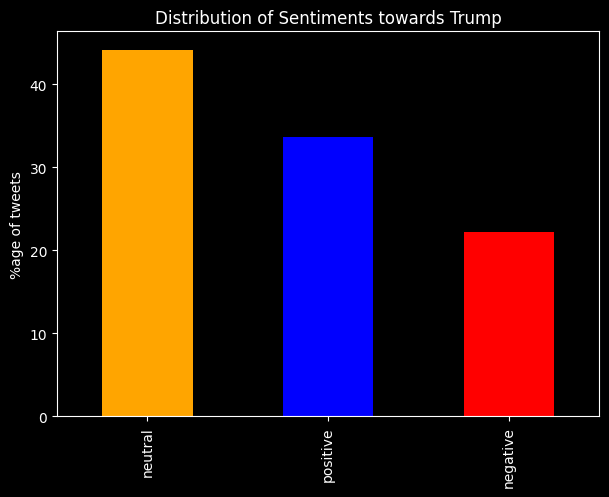

In [ ]:
# how much data is positive/negetive/neutral
plt.style.use('dark_background')
colors = ['orange', 'blue', 'red']

plt.figure(figsize=(7, 5))
(trump_tweets.analysis.value_counts(normalize=True) * 100).plot.bar(color=colors)
plt.ylabel("%age of tweets")
plt.title("Distribution of Sentiments towards Trump")
plt.show()

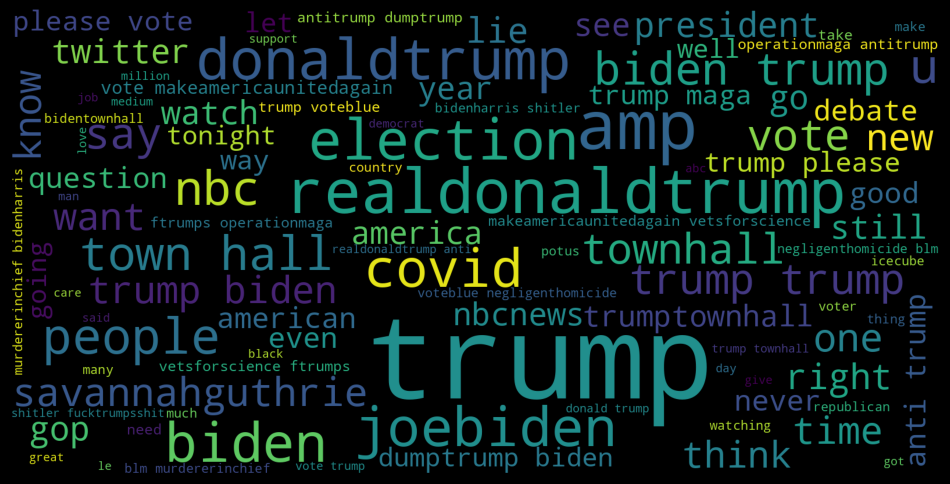

In [ ]:
from wordcloud import STOPWORDS
def word_cloud(wd_list):
	stopwords = set(STOPWORDS)
	all_words = ' '.join(wd_list)
	wordcloud = WordCloud(background_color='black',
						stopwords=stopwords,
						width=1600, height=800, max_words=100, max_font_size=200,
						colormap="viridis").generate(all_words)
	plt.figure(figsize=(12, 10))
	plt.axis('off')
	plt.imshow(wordcloud)

word_cloud(trump_tweets['cleantext'][:5000])

Joe Biden's Analysis

In [ ]:
biden_tweets = data[data['candidate'] == 'biden']
biden_tweets = biden_tweets.loc[biden_tweets.country == 'US']
biden_tweets = biden_tweets[['tweet']]
biden_tweets

,tweet
6,"In 2020, #NYPost is being #censorship #CENSORE..."
17,"Comments on this? ""Do Democrats Understand how..."
25,@RealJamesWoods #BidenCrimeFamily #JoeBiden #H...
29,Come on @ABC PLEASE DO THE RIGHT THING. Move t...
34,#realDonaldTrump addresses #JoeBiden and #Hunt...
...,...
776836,"#Biden 🗽🇺🇸👍🏽 | Images 📷 @ Santa Maria, CA. | ..."
776845,Will #criticalRaceTheory become ubiquitous in ...
776847,You moving near #Biden 🤔 https://t.co/1F6i1YIJ2P
776861,#election #2020Elections #trump #biden https:/...


In [ ]:
biden_tweets['cleantext']=biden_tweets['tweet'].apply(clean)
biden_tweets.head()

,tweet,cleantext
6,"In 2020, #NYPost is being #censorship #CENSORE...",nypost censorship censored twitter manipulate ...
17,"Comments on this? ""Do Democrats Understand how...",comment democrat understand ruthless china chi...
25,@RealJamesWoods #BidenCrimeFamily #JoeBiden #H...,realjameswoods bidencrimefamily joebiden hunte...
29,Come on @ABC PLEASE DO THE RIGHT THING. Move t...,come abc please right thing move biden town ha...
34,#realDonaldTrump addresses #JoeBiden and #Hunt...,realdonaldtrump address joebiden hunterbiden c...


In [ ]:
biden_tweets['subjectivity'] = biden_tweets['cleantext'].apply(getsubjectivity)
biden_tweets['polarity'] = biden_tweets['cleantext'].apply(getpolarity)
biden_tweets['analysis'] = biden_tweets['polarity'].apply(getAnalysis)
biden_tweets.head()

,tweet,cleantext,subjectivity,polarity,analysis
6,"In 2020, #NYPost is being #censorship #CENSORE...",nypost censorship censored twitter manipulate ...,0.678571,-0.148810,negative
17,"Comments on this? ""Do Democrats Understand how...",comment democrat understand ruthless china chi...,1.000000,-1.000000,negative
25,@RealJamesWoods #BidenCrimeFamily #JoeBiden #H...,realjameswoods bidencrimefamily joebiden hunte...,0.000000,0.000000,neutral
29,Come on @ABC PLEASE DO THE RIGHT THING. Move t...,come abc please right thing move biden town ha...,0.178571,0.078571,positive
34,#realDonaldTrump addresses #JoeBiden and #Hunt...,realdonaldtrump address joebiden hunterbiden c...,0.000000,0.000000,neutral


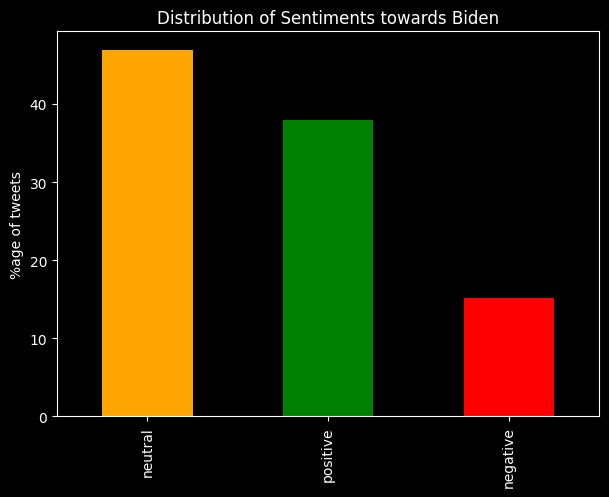

In [ ]:
# how much data is positive/negetive/neutral
plt.style.use('dark_background')
colors = ['orange', 'green', 'red']

plt.figure(figsize=(7, 5))
(biden_tweets.analysis.value_counts(normalize=True) * 100).plot.bar(color=colors)
plt.ylabel("%age of tweets")
plt.title("Distribution of Sentiments towards Biden")
plt.show()

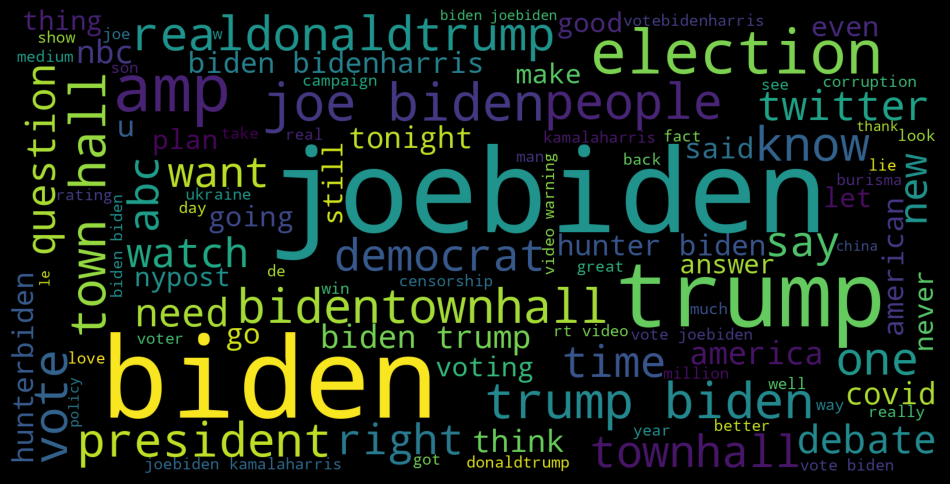

In [ ]:
word_cloud(biden_tweets['cleantext'][:5000])

In [ ]:
trump_tweets.analysis.value_counts(normalize=True)*100

neutral     44.159258
positive    33.623464
negative    22.217277
Name: analysis, dtype: float64

In [ ]:
biden_tweets.analysis.value_counts(normalize=True)*100

neutral     46.952578
positive    37.929828
negative    15.117594
Name: analysis, dtype: float64

favourable Attitude: There are more favourable tweets about Biden than on Trump. Compared to Trump's tweets (33.99%), Biden's tweets have a larger percentage of positive sentiment (36.43%). This indicates that Biden is receiving more positive feedback from Twitter users.

Trump receives somewhat more neutral sentiments (43.22%) than Biden (46.83%) in his tweets. Overall, however, Trump receives more neutral sentiments than Biden. This could suggest that people are more inclined to view Trump's tweets as impersonal or neutral, which would raise the rate of neutral attitude.


Negative Sentiment: Trump receives more negative responses than Biden: Although both candidates have faced criticism, there is a higher percentage of negative responses to Trump's tweets (22.78%) than to Biden's (16.79%). This suggests that there might have been a greater backlash on Twitter over Trump's remarks.


